## Exercise A
Consider the following signal: x(t)=cos(t^3).
<p><ol>
    <li>Write some MATLAB or Python code to identify an optimal sampling rate to retain most of the information of the original signal x(t).</li>
    <li>In what sense is this supposed to be an optimal sampling frequency?</li>
    <li>Is the original signal perfectly reconstructed? Explain why.</li>
</ol></p>
Hint: in MATLAB the function can be implemented    <font color='#bd4147'>x_fun=@(t)(cos(t.^3))</font>,  whereas in python you can use    <font color='#bd4147'>x_fun=lambda t: numpy.cos(t**3)</font>    

Text(0.5,1,'The original oversampled signal')

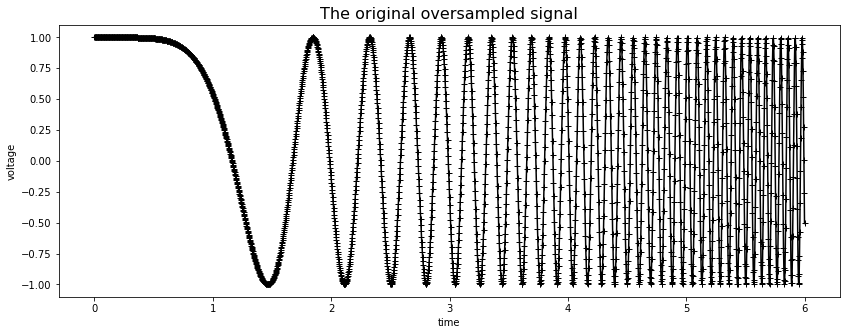

In [343]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# define function for our signal --> x(t)=cos(t^3)
x_fun=lambda t: np.cos(t**3)

# Initial oversampled signal
Fs = 400.                   # [Hz] Sampling frequency
deltat = 1./Fs              # [s]  Sampling period
T = 6.                      # [s]  Length of signal
t = np.arange(0, T, deltat) # [s]  Time vector
L = len(t)                  # [.]  Length of vector signal
x = x_fun(t)                # [any, e.g., Volt] Signal vector

fig, (plot1) = plt.subplots(nrows=1, ncols=1, figsize=(14,5))
plot1.set_xlabel('time')
plot1.set_ylabel('voltage')
plot1.plot(t,x,'+-k')
plot1.set_title('The original oversampled signal', fontsize=16)

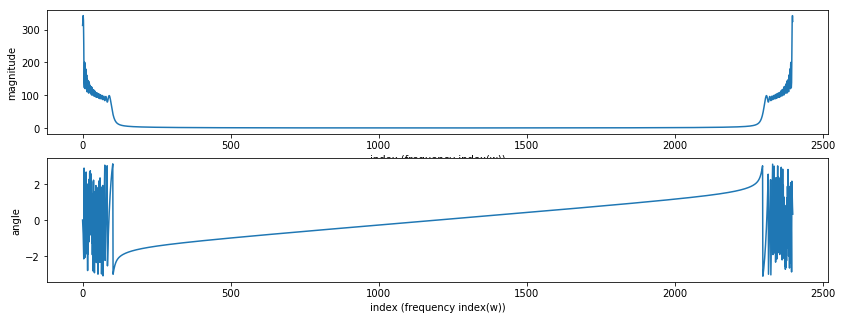

In [344]:
## Exercise A part 1: Find the Nyquist frequency
spec = np.fft.fft(x)

# fourier transformed in exponentioal form
# x(w) = R(w).e^(i*Q(w))
# spec = x(w)

fig, (plot1, plot2) = plt.subplots(nrows=2, ncols=1, figsize=(14,5))

# plot magnitude components of fourier transformed
plot1.set_xlabel('index (frequency index(w))')
# magnitude component of fourier transformed R(W)
plot1.set_ylabel('magnitude')
# plot magnitude components
plot1.plot(np.abs(spec))

# plot angle components of fourier transformed
plot2.set_xlabel('index (frequency index(w))')
# angle component of fourier transformed Q(W)
plot2.set_ylabel('angle')
# plot angle components
plot2.plot(np.angle(spec))

The crossing point of two line is (hertz =  25.0  ,magnitude =  0.17616526924  )


Text(25,1.17617,' magnitude = 0.17616526924')

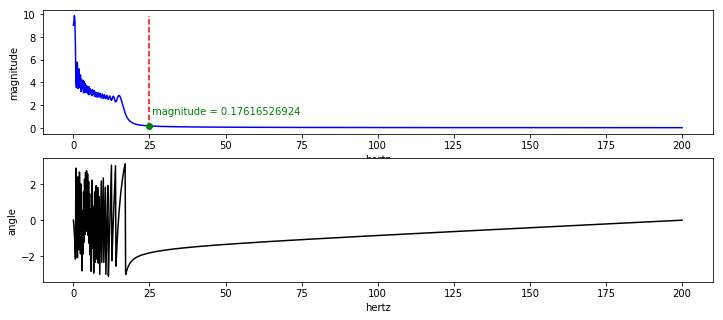

In [345]:
# Better way to see the spectrum
# 
# We need to break the plot from the middle in previous plot
# 
# Also the measurement of the x axis is the index of sampling
# we convert it to the frequency itself (Hertz)
# 
# Moreover, for simplicity we divided the value of
# frequency (which is the magnitude) to the square root of dim
# dim = number of samples devided by 2

def process_spectrum(spectrum, samp_freq):
    dim = int( spectrum.shape[0]*.5)
    omega = np.arange(0,dim+1)/(2*dim)*samp_freq
    X = spectrum[0:dim+1]/np.sqrt(dim)
    return omega, X
omega, X =  process_spectrum(spec, Fs)

fig, (plot1, plot2) = plt.subplots(nrows=2, ncols=1, figsize=(12,5))
plot1.set_xlabel('hertz')
plot1.set_ylabel('magnitude')
plot1.plot(omega, np.abs(X),'b')

plot2.set_xlabel('hertz')
plot2.set_ylabel('angle')
plot2.plot(omega, np.angle(X),'k')

# identify the frequency
# 
# We define a value for frequency which after that there is no
# fluctuation in the value of magnitude and angle in the
# frequency domain
# 
# So I consider the new optimal frequency 25 
new_freq = 25.
plot1.plot([new_freq , new_freq ], [0,max(np.abs(X))],'--r')

index = omega.tolist().index(25)
print("The crossing point of two line is (hertz = ",omega[index]," ,magnitude = ", np.abs(X)[index]," )")
plot1.plot([omega[index]], [np.abs(X)[index]], 'go')
plot1.text(omega[index], np.abs(X)[index]+1, " magnitude = "+str(np.abs(X)[index]), color='green')

As we found (Nyquist frequency = 25 Hertz) which is the half of the sampling rate of a discrete signal processing system.

Here I add some definition from WikiPedia that I am used to answer this assignment.

### Nyquist–Shannon sampling theorem
In the field of digital signal processing, the sampling theorem is a fundamental bridge between continuous-time signals (often called "analog signals") and discrete-time signals (often called "digital signals"). It establishes a sufficient condition for a sample rate that permits a discrete sequence of samples to capture all the information from a continuous-time signal of finite bandwidth.

Strictly speaking, the theorem only applies to a class of mathematical functions having a Fourier transform that is zero outside of a finite region of frequencies. Intuitively we expect that when one reduces a continuous function to a discrete sequence and interpolates back to a continuous function, the fidelity of the result depends on the density (or sample rate) of the original samples. The sampling theorem introduces the concept of a sample rate that is sufficient for perfect fidelity for the class of functions that are bandlimited to a given bandwidth, such that no actual information is lost in the sampling process. It expresses the sufficient sample rate in terms of the bandwidth for the class of functions. The theorem also leads to a formula for perfectly reconstructing the original continuous-time function from the samples.

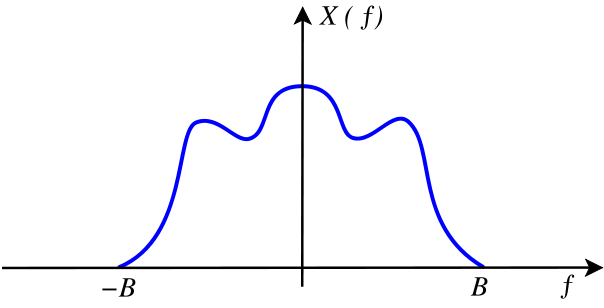
<center>Example of magnitude of the Fourier transform of a bandlimited function</center>



The Nyquist frequency should not be confused with the Nyquist rate, which is the minimum sampling rate that satisfies the Nyquist sampling criterion for a given signal or family of signals. The Nyquist rate is twice the maximum component frequency of the function being sampled.

Thus, for our function <font color='#bd4147'>$x(t)=cos(t^3)$</font> the Nyquist frequency (B) is equal to 25 Hertz and Nyquist rate or optimal (minimum) sampling rate to retain most of the information of the original signal is equal to $2 \times B = 50 Hz$


This 50 Hz is the optimal sampling frequency in the sense that for sampling a continueous signal in a discrete way which we call sampling rate with this rate we capture the information of the original continuous signal.

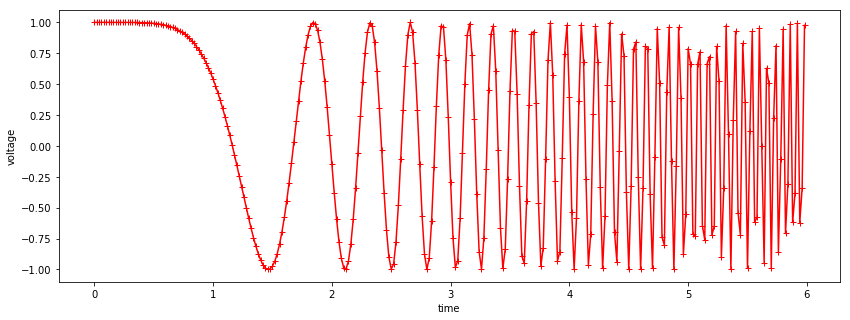

In [346]:
## Exercise A part 3: Signal Reconstruction
Fs_sub = 2*new_freq                 # [Hz] Sampling frequency
deltat_sub = 1./Fs_sub              # [s]  Sampling period
t_sub = np.arange(0, T, deltat_sub) # [s]  Time vector
L_sub = len(t_sub)                  # [.]  Length of vector signal
x_sub = x_fun(t_sub)                 # [any, e.g., Volt] Signal vector

fig, (plot1) = plt.subplots(nrows=1, ncols=1, figsize=(14,5))
plot1.set_xlabel('time')
plot1.set_ylabel('voltage')
plot1.plot(t_sub,x_sub,'+-r')

Above plot figure is the original signal sampled with the optimal sampling rate.

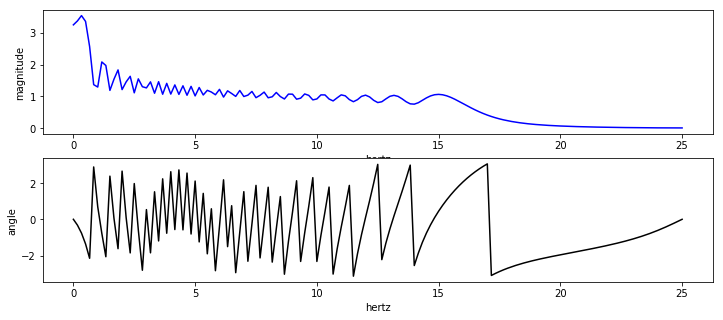

In [347]:
# Now I compute the fast fourier transform of the samples
spec = np.fft.fft(x_sub)
omega, X = process_spectrum(spec, Fs_sub)

# And I plot the magnitude and angle component of the frequency domain signal
fig, (plot1, plot2) = plt.subplots(nrows=2, ncols=1, figsize=(12,5))
#  Plot magnitude component
plot1.set_xlabel('hertz')
plot1.set_ylabel('magnitude')
plot1.plot(omega, np.abs(X),'b')

#  Plot angle component
plot2.set_xlabel('hertz')
plot2.set_ylabel('angle')
plot2.plot(omega, np.angle(X),'k')

For reconstructing a signal from its samples, I am using the signal-reconstruction formula from the lecture slides which is:

$$ 
    \begin{align*}
        x(t) = \sum_{n=-\infty}^{\infty} x_{n}sinc(\hat{\omega} t - n)
    \end{align*}
$$

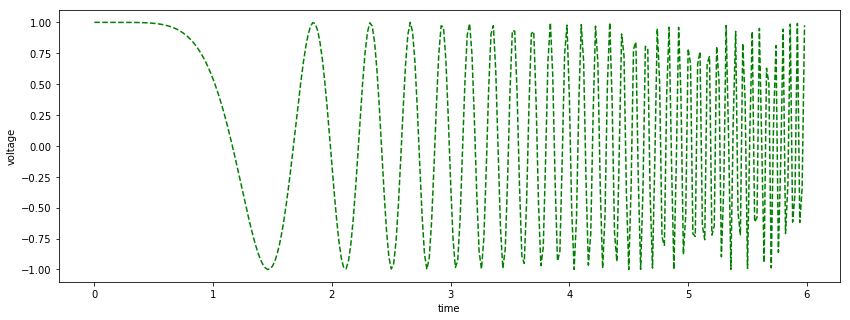

In [348]:
# reconstruction of the original signal from the discrete samples
x_rec = t*0.
for k in range(L_sub):
    x_rec += x_sub[k]*np.sinc(t*Fs_sub - k)

fig, (plot1) = plt.subplots(nrows=1, ncols=1, figsize=(14,5))
plot1.set_xlabel('time')
plot1.set_ylabel('voltage')
plot1.plot(t_sub, x_sub, 'g--')

As you can see in the above figure the original signal reconstructed with the comparatively less samples (smaller sampling rate) in a way that is acceptable (it represent most of the information of the continuous original signal) for the given period between [$0$ $6$]. If I increase this period (length of the signal) the behavior of the signal is not as clear as its original one but still acceptable.

So I think the optimal sampling rate is also dependend to the length of the signal for some specific functions.
In the following section of the assignment report I will also plot the reconstructed signal for the period between [$0$ $20$].

The crossing point of two line is (hertz =  25.0  ,magnitude =  1.20199699061  )
The crossing point of the proposed frequency line is (hertz =  195.0  ,magnitude =  0.146004014266  )


Text(0.5,1,'reconstruction of the original signal from the discrete sampling rate = 50 Hz')

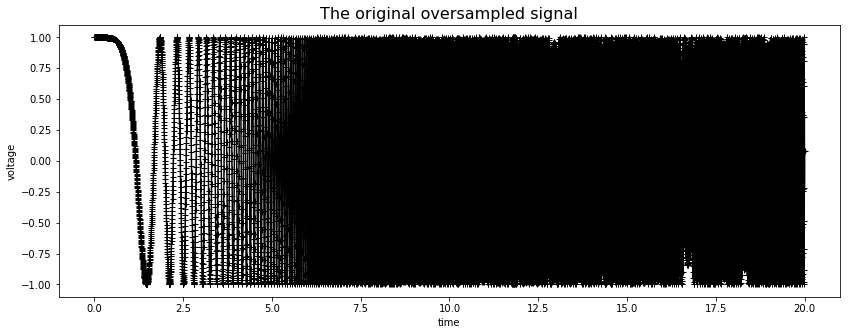

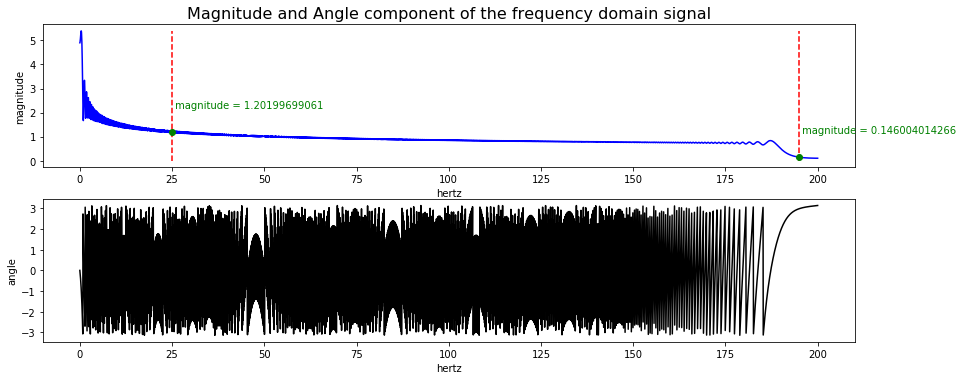

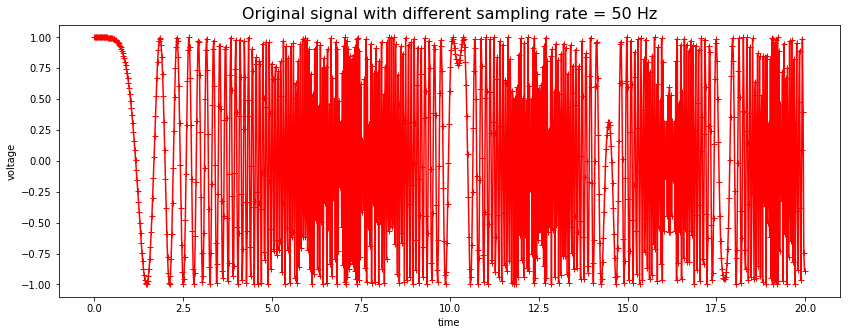

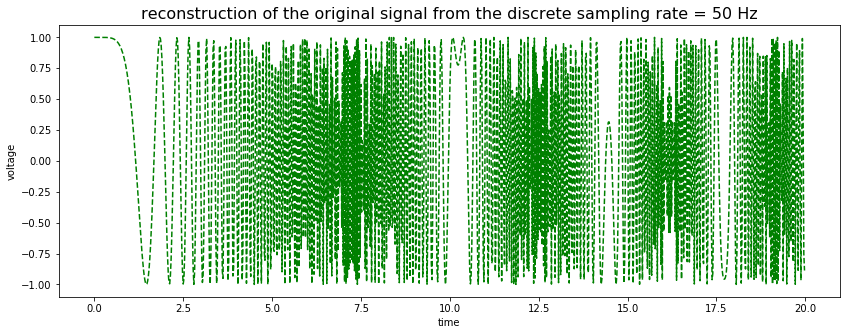

In [292]:
# Initial oversampled signal
Fs = 400.                   # [Hz] Sampling frequency
deltat = 1./Fs              # [s]  Sampling period
T = 20.                     # [s]  Length of signal
t = np.arange(0, T, deltat) # [s]  Time vector
L = len(t)                  # [.]  Length of vector signal
x = x_fun(t)                # [any, e.g., Volt] Signal vector

fig, (plot1) = plt.subplots(nrows=1, ncols=1, figsize=(14,5))
plot1.set_xlabel('time')
plot1.set_ylabel('voltage')
plot1.plot(t,x,'+-k')
plot1.set_title('The original oversampled signal', fontsize=16)

# Now I compute the fast fourier transform of the samples
spec = np.fft.fft(x)

# fourier transformed in exponentioal form
# x(w) = R(w).e^(i*Q(w))
# spec = x(w)
omega, X = process_spectrum(spec, Fs)

# And I plot the magnitude and angle component of the frequency domain signal
fig, (plot1,plot2) = plt.subplots(nrows=2, ncols=1, figsize=(12,5))
fig.tight_layout()
#  Plot magnitude component
plot1.set_xlabel('hertz')
plot1.set_ylabel('magnitude')
plot1.plot(omega, np.abs(X),'b')
plot1.set_title('Magnitude and Angle component of the frequency domain signal', fontsize=16)

#  Plot angle component
plot2.set_xlabel('hertz')
plot2.set_ylabel('angle')
plot2.plot(omega, np.angle(X),'k')

# identify the frequency
# 
# We define a value for frequency which after that there is no
# fluctuation in the value of magnitude and angle in the
# frequency domain
# 
# So I consider the new optimal frequency 25 
new_freq = 25.
plot1.plot([new_freq , new_freq ], [0,max(np.abs(X))],'--r')
index = omega.tolist().index(new_freq)
print("The crossing point of two line is (hertz = ",omega[index]," ,magnitude = ", np.abs(X)[index]," )")
plot1.plot([omega[index]], [np.abs(X)[index]], 'go')
plot1.text(omega[index], np.abs(X)[index]+1, " magnitude = "+str(np.abs(X)[index]), color='green')

proposed_freq = 195.
plot1.plot([proposed_freq , proposed_freq ], [0,max(np.abs(X))],'--r')
index = omega.tolist().index(proposed_freq)
print("The crossing point of the proposed frequency line is (hertz = ",omega[index]," ,magnitude = ", np.abs(X)[index]," )")
plot1.plot([omega[index]], [np.abs(X)[index]], 'go')
plot1.text(omega[index], np.abs(X)[index]+1, " magnitude = "+str(np.abs(X)[index]), color='green')


## Signal Reconstruction
Fs_sub = 2*new_freq                 # [Hz] Sampling frequency
deltat_sub = 1./Fs_sub              # [s]  Sampling period
t_sub = np.arange(0, T, deltat_sub) # [s]  Time vector
L_sub = len(t_sub)                  # [.]  Length of vector signal
x_sub = x_fun(t_sub)                 # [any, e.g., Volt] Signal vector

# original signal with different sampling rate
fig, (plot1) = plt.subplots(nrows=1, ncols=1, figsize=(14,5))
plot1.set_xlabel('time')
plot1.set_ylabel('voltage')
plot1.plot(t_sub,x_sub,'+-r')
plot1.set_title('Original signal with different sampling rate = 50 Hz', fontsize=16)



# reconstruction of the original signal from the discrete samples
x_rec = t*0.
for k in range(L_sub):
    x_rec += x_sub[k]*np.sinc(t*Fs_sub - k)
fig, (plot1) = plt.subplots(nrows=1, ncols=1, figsize=(14,5))
plot1.set_xlabel('time')
plot1.set_ylabel('voltage')
plot1.plot(t_sub, x_sub, 'g--')
plot1.set_title('reconstruction of the original signal from the discrete sampling rate = 50 Hz', fontsize=16)

Although in part of the reconstructed signal we have some misrepresentation, it is still representing the original signal with the sampling frequency in an efficient way. 
My proposal to have a better representation of the signal is that we must compute the Nyquist frequency for this given length of the signal which is 195 Hz for the period of 20 second instead of 6 second. You can see a different Nyquist frequency (B) at "Magnitude and Angle component of the frequency domain signal" Plot for period of [$0$ $20$]

## Exercise B)
Consider the attached electrocardiographic tracing <font color='#bd4147'>ecg.csv</font>. The file contains two columns, the first one reports the time instants and the second one the measured voltage.
1. Identify the original sampling frequency by looking at the recorded times.
2. Do the same exercise A, this time with respect to the attached dataset.

Hint: being the signal already sampled, you can select as new sampling rate 1/2, 1/3, 1/4... of the original one by taking every second, third, fourth... sample.

In [349]:
# read the data from the file
from numpy import genfromtxt
original_samples = genfromtxt('ecg.csv', delimiter=',')

# Identify the original sampling frequency by 
# computing the mean of the intervals
# so I create two temporary copy of time column
# and shift them to left and right to calculate 
# all the intervals
temp1_org_samples = original_samples[1:,0]
temp2_org_samples = original_samples[:3599,0]

all_time_intervals = temp1_org_samples - temp2_org_samples
avg_time_intervals = np.mean(all_time_intervals)
print("Average time intervals between two consecutive sample is: ", avg_time_intervals)
org_sampling_frequency = 1/avg_time_intervals
print("Original sampling frequency is: ",org_sampling_frequency)



Average time intervals between two consecutive sample is:  0.00277771603223
Original sampling frequency is:  360.008002401


Text(0.5,1,'The original oversampled signal')

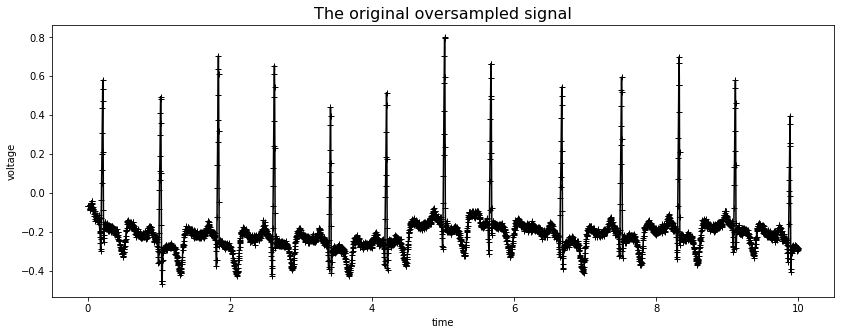

In [362]:
# Initial oversampled signal
Fs = org_sampling_frequency # [Hz] Sampling frequency
deltat = 1./Fs              # [s]  Sampling period
T = 9.997                   # [s]  Length of signal
t = np.arange(0, T+deltat, deltat) # [s]  Time vector
L = len(t)                  # [.]  Length of vector signal
x = original_samples[:,1]   # [any, e.g., Volt] Signal vector

fig, (plot1) = plt.subplots(nrows=1, ncols=1, figsize=(14,5))
plot1.set_xlabel('time')
plot1.set_ylabel('voltage')
plot1.plot(t,x,'+-k')
plot1.set_title('The original oversampled signal', fontsize=16)

The crossing point of two line is (hertz =  45.0010003001  ,magnitude =  0.0888774834341  )


Text(45.001,1.08888,' magnitude = 0.0888774834341')

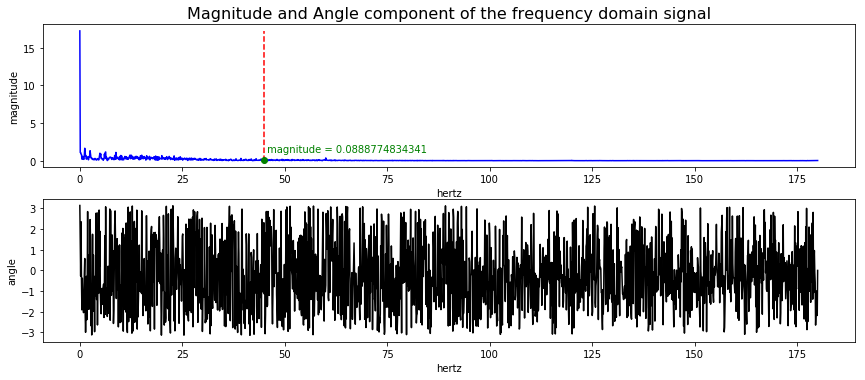

In [391]:
# Now I compute the fast fourier transform of the samples
spec = np.fft.fft(x)

# fourier transformed in exponentioal form
# x(w) = R(w).e^(i*Q(w))
# spec = x(w)
omega, X = process_spectrum(spec, Fs)

# And I plot the magnitude and angle component of the frequency domain signal
fig, (plot1,plot2) = plt.subplots(nrows=2, ncols=1, figsize=(12,5))
fig.tight_layout()
#  Plot magnitude component
plot1.set_xlabel('hertz')
plot1.set_ylabel('magnitude')
plot1.plot(omega, np.abs(X),'b')
plot1.set_title('Magnitude and Angle component of the frequency domain signal', fontsize=16)

#  Plot angle component
plot2.set_xlabel('hertz')
plot2.set_ylabel('angle')
plot2.plot(omega, np.angle(X),'k')

# identify the frequency
# 
# We define a value for frequency which after that there is no
# fluctuation in the value of magnitude and angle in the
# frequency domain
# 
# So I consider the new optimal frequency 25 
new_freq = Fs/8
plot1.plot([new_freq , new_freq ], [0,max(np.abs(X))],'--r')
index = min(range(len(omega)), key=lambda i: abs(omega[i]-new_freq))
print("The crossing point of two line is (hertz = ",omega[index]," ,magnitude = ", np.abs(X)[index]," )")
plot1.plot([omega[index]], [np.abs(X)[index]], 'go')
plot1.text(omega[index], np.abs(X)[index]+1, " magnitude = "+str(np.abs(X)[index]), color='green')

Text(0.5,1,'Original signal with different sampling rate = 90 Hz')

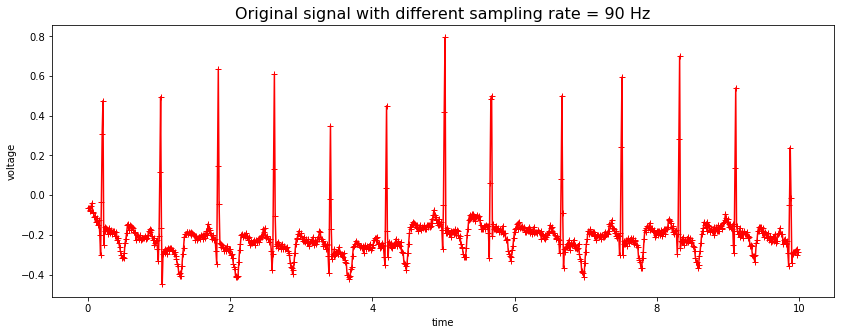

In [394]:
## Signal Reconstruction
Fs_sub = 2*new_freq                 # [Hz] Sampling frequency which is  90 Hz
deltat_sub = 1./Fs_sub              # [s]  Sampling period
t_sub = np.arange(0, T, deltat_sub) # [s]  Time vector
L_sub = len(t_sub)                  # [.]  Length of vector signal
x_sub = original_samples[::4,1]     # [any, e.g., Volt] Signal vector

# original signal with different sampling rate
fig, (plot1) = plt.subplots(nrows=1, ncols=1, figsize=(14,5))
plot1.set_xlabel('time')
plot1.set_ylabel('voltage')
plot1.plot(t_sub,x_sub,'+-r')
plot1.set_title('Original signal with different sampling rate = 90 Hz', fontsize=16)

Text(0.5,1,'reconstruction of the original signal from the discrete sampling rate = 90 Hz')

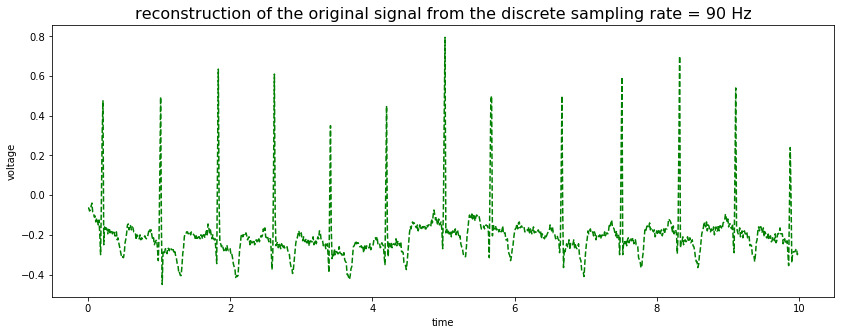

In [395]:
# reconstruction of the original signal from the discrete samples
x_rec = t*0.
for k in range(L_sub):
    x_rec += x_sub[k]*np.sinc(t*Fs_sub - k)
fig, (plot1) = plt.subplots(nrows=1, ncols=1, figsize=(14,5))
plot1.set_xlabel('time')
plot1.set_ylabel('voltage')
plot1.plot(t_sub, x_sub, 'g--')
plot1.set_title('reconstruction of the original signal from the discrete sampling rate = 90 Hz', fontsize=16)